In [1]:
import os
os.chdir('/scratch/sagarsj42')

In [23]:
import time
import pickle
import multiprocessing

import numpy as np
import scipy.spatial as sp
import gensim

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
with open('vocab.pkl', 'rb') as f:
    vocab = pickle.load(f)

len(vocab)

50932

In [4]:
u = np.load('u.npy')
s = np.load('s.npy')
u.shape, s.shape

((50932, 750), (750,))

In [5]:
e = u * s
e.shape

(50932, 750)

In [7]:
i = vocab.index('camera')
w1_e = e[i]
w1_e.shape

(750,)

In [8]:
distances = list()
for i in range(50932):
    w2_e = e[i]
    distances.append((sp.distance.cosine(w1_e, w2_e), vocab[i]))
    
distances[:10]

[(0.8059779601384243, 'we'),
 (0.7482707510874747, 'got'),
 (0.646453006020335, 'this'),
 (0.6629346888967802, 'for'),
 (0.7121355381247378, 'my'),
 (0.7106138454211817, 'husband'),
 (0.7780106761984138, 'who'),
 (0.6314838049685192, 'is'),
 (0.7906894644377964, 'an'),
 (0.7118039839067032, 'over')]

In [9]:
distances.sort(key=lambda t: t[0])
distances[:11]

[(0.0, 'camera'),
 (0.19719566991147985, 'afloat'),
 (0.19860585020830512, 'glazer'),
 (0.227132303353194, 'paddy'),
 (0.2622693856612147, 'chums'),
 (0.2695240230903264, 'subcompact'),
 (0.27016883199141495, 'steadying'),
 (0.2726854541436079, 'wolf'),
 (0.2764312724655691, 'bobbled'),
 (0.2785128479018991, 'shake'),
 (0.29210020381534374, 'body')]

In [10]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format(
    '~/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', binary=True)

w1_e = word2vec['camera']
w1_e.shape

(300,)

In [11]:
distances = list()
for word in vocab:
    try:
        w2_e = word2vec[word]
    except KeyError:
        w2e = np.zeros(300)
    distances.append((sp.distance.cosine(w1_e, w2_e), word))
    
distances[:10]

[(0.9034783244132996, 'we'),
 (0.8751401305198669, 'got'),
 (0.9668513834476471, 'this'),
 (1.0030541874002665, 'for'),
 (0.8633989840745926, 'my'),
 (0.8664259761571884, 'husband'),
 (0.9332376345992088, 'who'),
 (0.9353648945689201, 'is'),
 (0.9466216117143631, 'an'),
 (0.9986811223207042, 'over')]

In [12]:
distances.sort(key=lambda t: t[0])
distances[:11]

[(0.0, 'camera'),
 (0.18680614233016968, 'cameras'),
 (0.29625242948532104, 'camcorder'),
 (0.3810161352157593, 'tripod'),
 (0.403339147567749, 'viewfinder'),
 (0.42922067642211914, 'projector'),
 (0.4313773512840271, 'flashguns'),
 (0.4367401599884033, 'camcorders'),
 (0.4489501714706421, 'microphone'),
 (0.45192039012908936, 'lens'),
 (0.45716017484664917, 'cam')]

In [20]:
e_pca = PCA(n_components=25).fit_transform(e)
e_pca.shape

(50932, 25)

In [26]:
e_tsne = TSNE(n_components=2, perplexity=10, 
              metric='cosine', init='pca', square_distances=True,
              n_jobs=multiprocessing.cpu_count()).fit_transform(e_pca)
e_tsne.shape

(50932, 2)

In [34]:
select_ind = np.random.randint(low=0, high=50932, size=5)
words = [vocab[i] for i in select_ind]
word_embeds = [e_tsne[i] for i in select_ind]
words

['jackhammered', 'sharper', 'amid', 'secretion', 'chapeau']

In [62]:
word_distances = dict()

for w, w1_e in zip(words, word_embeds):
    distances = list()
    for i in range(50932):
        if vocab.index(w) != i:
            w2_e = e_tsne[i]
            distances.append((vocab[i], w2_e, sp.distance.cosine(w1_e, w2_e)))
    
    distances.sort(key=lambda t: t[2])
    word_distances[w] = (w1_e, distances[:10])

word_distances

{'jackhammered': (array([-1939.9004 ,   563.46674], dtype=float32),
  [('illegal', array([-1688.4149 ,   490.22903], dtype=float32), 0.0),
   ('beforehand', array([-1626.4364 ,   472.39188], dtype=float32), 0.0),
   ('irritated', array([-1625.7258 ,   472.25333], dtype=float32), 0.0),
   ('responding', array([-1155.0225 ,   335.31207], dtype=float32), 0.0),
   ('builder', array([-1601.2877 ,   465.69034], dtype=float32), 0.0),
   ('collectible', array([-1869.2338 ,   543.40735], dtype=float32), 0.0),
   ('peeler', array([-1894.3253 ,   550.69684], dtype=float32), 0.0),
   ('lossless', array([-1418.4684,   411.8988], dtype=float32), 0.0),
   ('yawning', array([-1921.7433 ,   558.13416], dtype=float32), 0.0),
   ('spectacle', array([-1877.4283 ,   545.25696], dtype=float32), 0.0)]),
 'sharper': (array([206.72343, 182.09059], dtype=float32),
  [('earphone',
    array([911.6084 , 805.07654], dtype=float32),
    8.344650268554688e-07),
   ('hitting',
    array([1296.9012, 1134.6688], dtype=

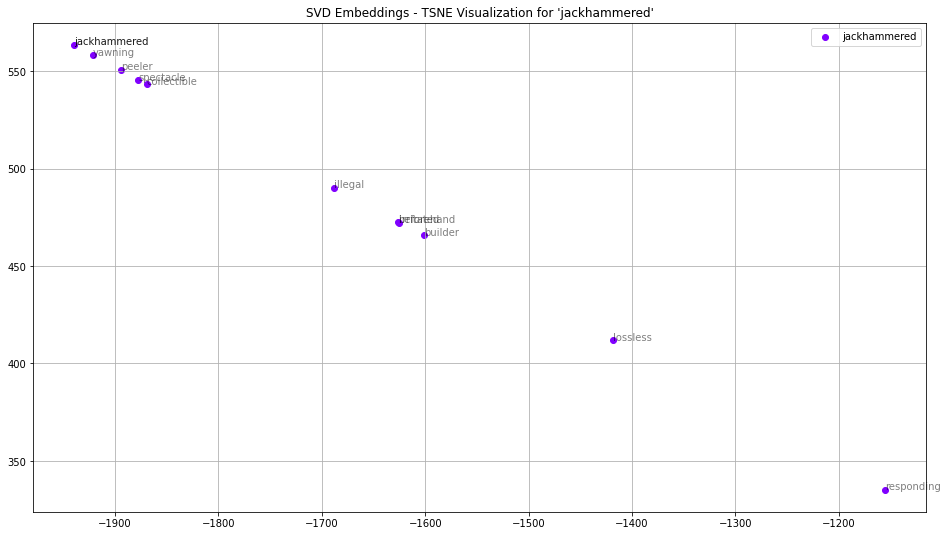

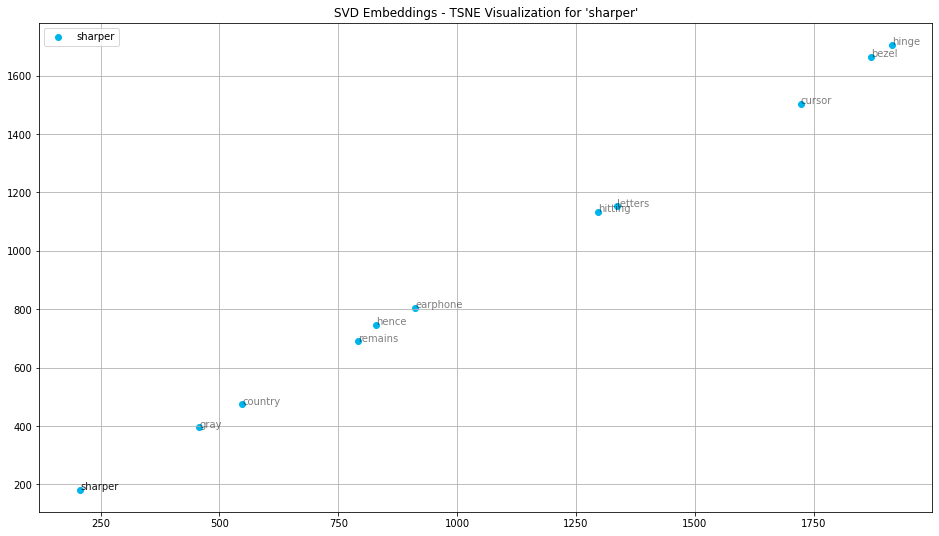

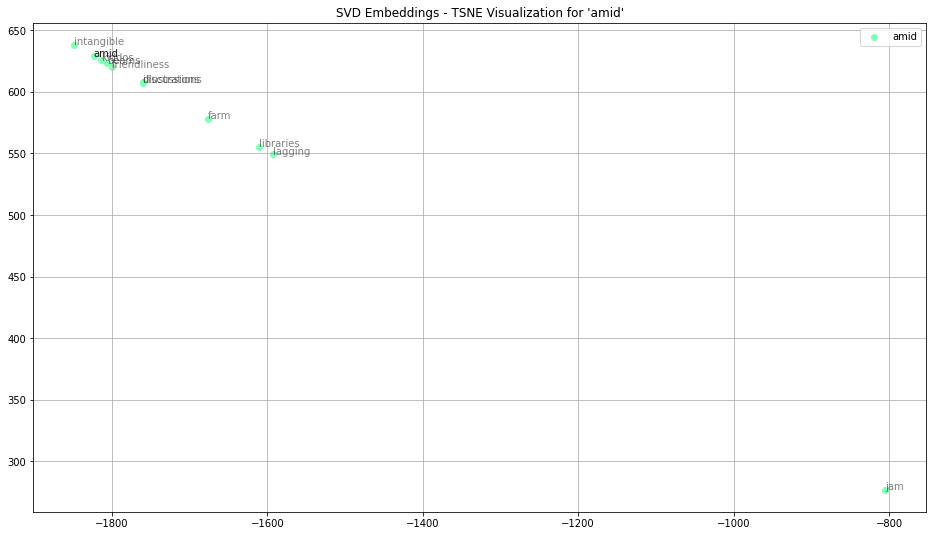

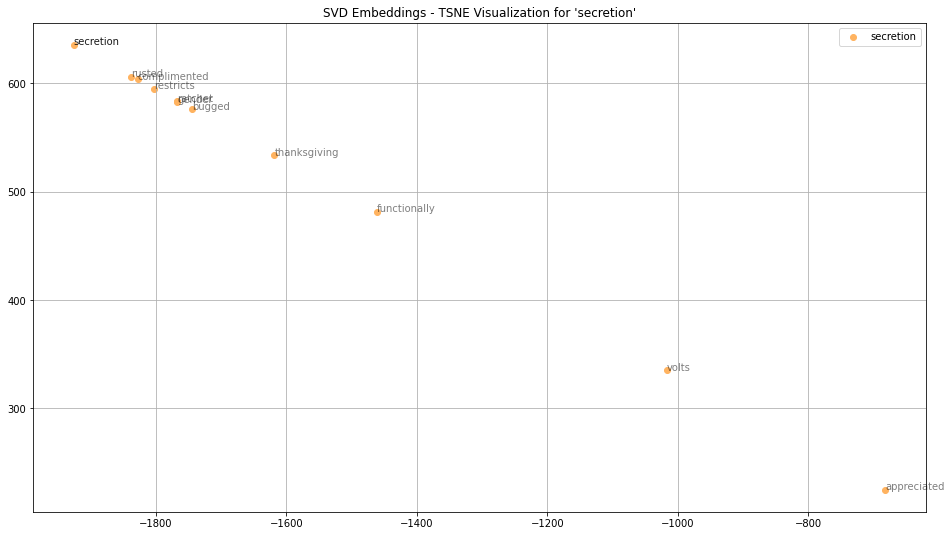

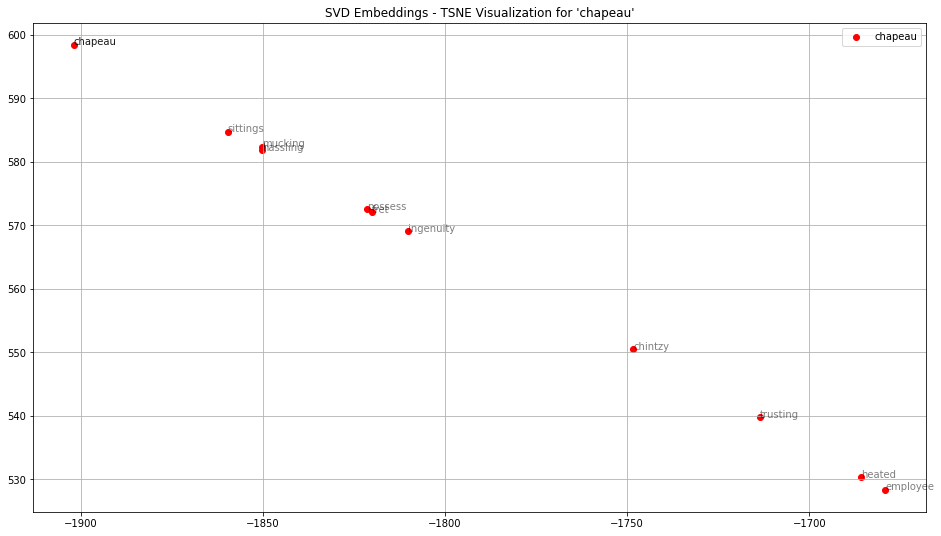

In [77]:
colors = cm.rainbow(np.linspace(0, 1, 5))
for word, color in zip(word_distances, colors):
    plt.figure(figsize=(16, 9))
    w1_e = word_distances[word][0]
    distances = word_distances[word][1]
    x = w1_e[0]
    y = w1_e[1]
    plt.scatter(x, y, label=word, color=color)
    plt.annotate(word, alpha=0.9, xy=(x, y))
    for d in distances:
        word2 = d[0]
        w2_e = d[1]
        x = w2_e[0]
        y = w2_e[1]
        plt.scatter(x, y, color=color)
        plt.annotate(word2, alpha=0.5, xy=(x, y))
    
    plt.title('SVD Embeddings - TSNE Visualization for \'' + word + '\'')
    plt.legend()
    plt.grid()
    plt.savefig('svd-'+word+'.png')
    plt.show()